<a href="https://colab.research.google.com/github/plaban1981/HACKEREARTH/blob/master/Transunion_machine_learning_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

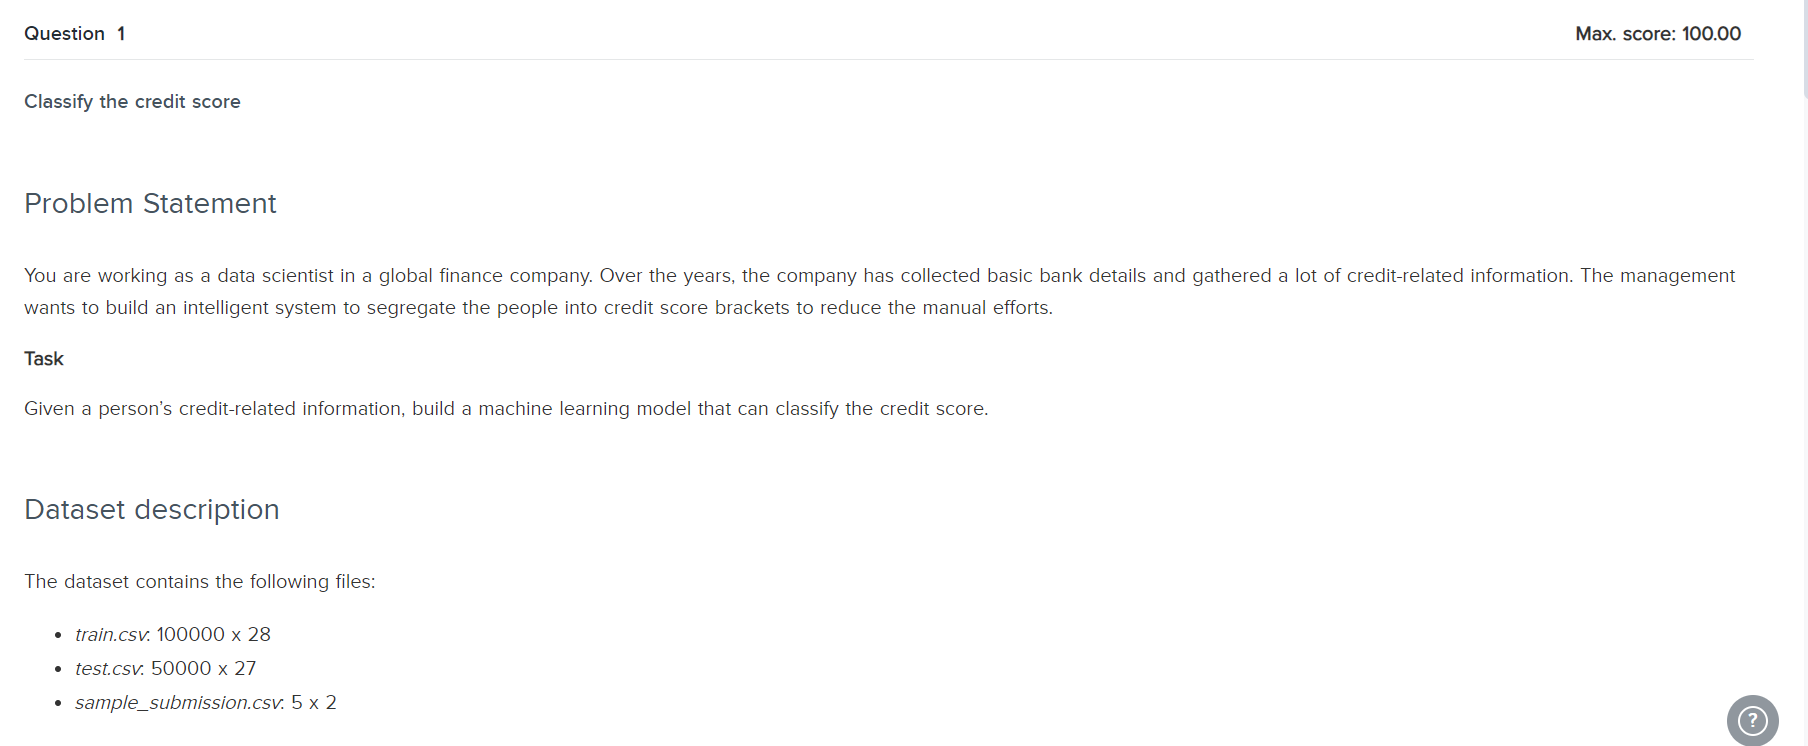

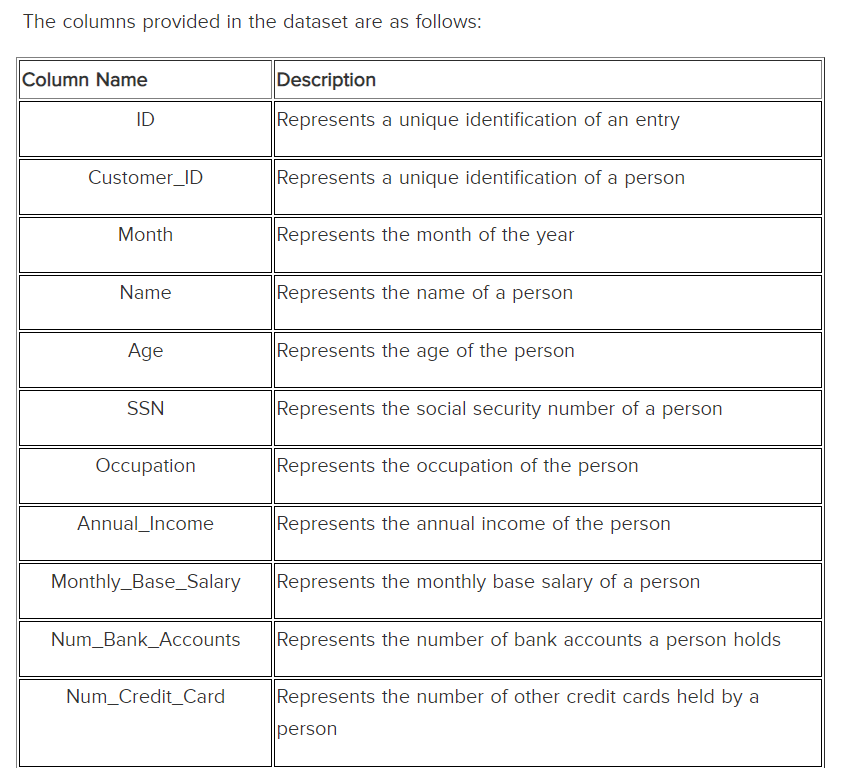

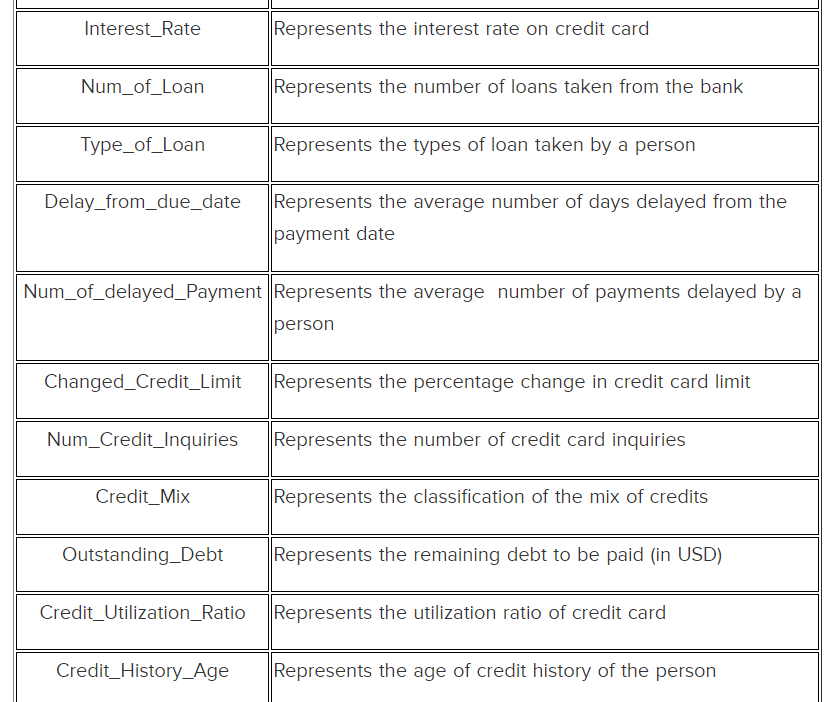

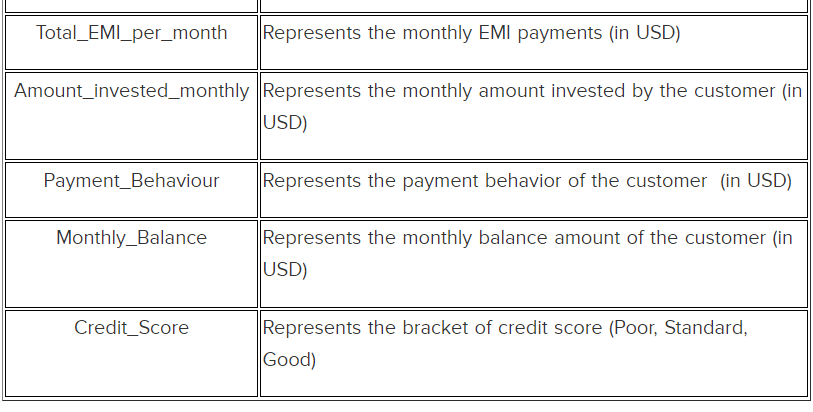

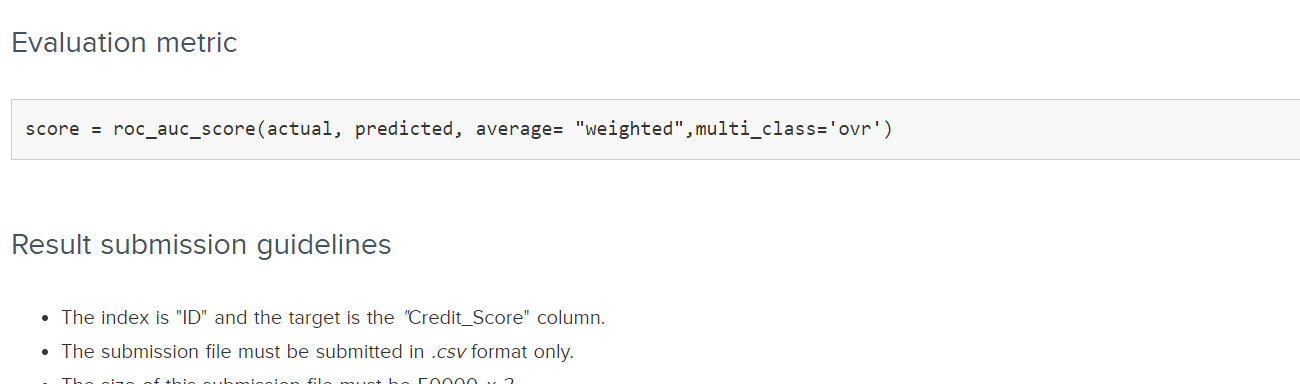

In [1]:
!pip install --quiet pycaret[full]

     |████████████████████████████████| 320 kB 5.3 MB/s 
     |████████████████████████████████| 88 kB 5.3 MB/s 
     |████████████████████████████████| 1.3 MB 65.3 MB/s 
     |████████████████████████████████| 120 kB 68.2 MB/s 
     |████████████████████████████████| 262 kB 67.4 MB/s 
     |████████████████████████████████| 2.0 MB 69.4 MB/s 
     |████████████████████████████████| 6.8 MB 41.2 MB/s 
     |████████████████████████████████| 17.8 MB 411 kB/s 
     |████████████████████████████████| 56 kB 3.2 MB/s 
     |████████████████████████████████| 167 kB 57.9 MB/s 
     |████████████████████████████████| 1.7 MB 45.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 40 kB 6.2 MB/s 
     |████████████████████████████████| 100 kB 11.5 MB/s 
     |████████████████████████████████| 132 kB 69.8 MB/s 
     |████████████████████

In [1]:
! pip install --quiet markupsafe==2.0.1

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Import necessary packages

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#
import jinja2
from pycaret.classification import *
#
%matplotlib inline

## Import Data

In [58]:
train = pd.read_csv("/content/drive/MyDrive/HackerEarth/TransUnion/train.csv")
test = pd.read_csv("/content/drive/MyDrive/HackerEarth/TransUnion/test.csv")
sub = pd.read_csv("/content/drive/MyDrive/HackerEarth/TransUnion/sample_submission.csv")

## Visualize data imported

In [5]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Data Summary Statistics

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

## Check the missing values

In [8]:
train.isnull().sum()[train.isnull().sum() > 0]/len(train)

Name                       0.09985
Monthly_Inhand_Salary      0.15002
Type_of_Loan               0.11408
Num_of_Delayed_Payment     0.07002
Num_Credit_Inquiries       0.01965
Credit_History_Age         0.09030
Amount_invested_monthly    0.04479
Monthly_Balance            0.01200
dtype: float64

In [9]:
test.isnull().sum()[test.isnull().sum() > 0]/len(test)

Name                       0.10030
Monthly_Inhand_Salary      0.14996
Type_of_Loan               0.11408
Num_of_Delayed_Payment     0.06996
Num_Credit_Inquiries       0.02070
Credit_History_Age         0.08940
Amount_invested_monthly    0.04542
Monthly_Balance            0.01124
dtype: float64

In [10]:
non_repeat_cols_train = [col for col in train.columns if train[col].nunique() == len(train)]

In [11]:
non_repeat_cols_test = [col for col in test.columns if test[col].nunique() == len(test)]

In [12]:
non_repeat_cols_train,non_repeat_cols_test

(['ID', 'Credit_Utilization_Ratio'], ['ID', 'Credit_Utilization_Ratio'])

In [8]:
cat_cols = [col for col in train.columns if train[col].dtypes == 'object' and col != 'ID']

In [9]:
cat_cols

['Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

In [16]:
train[cat_cols].head()

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,_,809.98,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,NaN,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,_,Good,809.98,22 Years and 3 Months,No,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,6.27,Good,809.98,22 Years and 4 Months,No,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,22 Years and 5 Months,No,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Data Preprocessing

In [10]:
drop_cols  = ['ID']
train_new = train.drop(drop_cols,axis=1)
test_new = test.drop(drop_cols,axis=1)

In [11]:
test_new['Credit_Score'] = 'NA'

## Combining both train and test data to preprocess the data


In [12]:
data = pd.concat([train_new,test_new],axis=0)

In [13]:
train_new.shape,test_new.shape,data.shape

((100000, 27), (50000, 27), (150000, 27))

## Get the list of unique customer id

In [14]:
unique_cust_list = data['Customer_ID'].unique().tolist()

In [15]:
len(unique_cust_list)

12500

## Prepare a dictionary to fill in most commonly occuring values for attributes specific to Customer ID

In [16]:
print(data[data['Customer_ID'] == unique_cust_list [0]]['Age'].mode()[0])
print(data[data['Customer_ID'] == unique_cust_list [0]]['SSN'].mode()[0])
print(data[data['Customer_ID'] == unique_cust_list [0]]['Monthly_Inhand_Salary'].mode()[0])
print(data[data['Customer_ID'] == unique_cust_list [0]]['Credit_History_Age'].mode()[0])
print(data[data['Customer_ID'] == unique_cust_list [0]]['Credit_Mix'].mode()[0])
print(data[data['Customer_ID'] == unique_cust_list [0]]['Num_Credit_Card'].mode()[0])
print(data[data['Customer_ID'] == unique_cust_list [0]]['Occupation'].mode()[0])
print(data[data['Customer_ID'] == unique_cust_list [0]]['Num_of_Loan'].mode()[0])
print(data[data['Customer_ID'] == unique_cust_list [0]]['Num_Credit_Inquiries'].mode()[0])
print(data[data['Customer_ID'] == unique_cust_list [0]]['Credit_History_Age'].mode()[0])


23
821-00-0265
1824.8433333333328
22 Years and 1 Months
Good
4
Scientist
4
4.0
22 Years and 1 Months


In [17]:
occ_dict = {}
for cust_id in unique_cust_list :
  occ_dict[cust_id] = data[data['Customer_ID'] == cust_id]['Occupation'].mode()[0]

In [18]:
num_loan  = {}
for cust_id in unique_cust_list :
  num_loan[cust_id] = data[data['Customer_ID'] == cust_id]['Num_of_Loan'].mode()[0]

In [19]:
age_dict = {}
for cust_id in unique_cust_list :
  age_dict[cust_id] = data[data['Customer_ID'] == cust_id]['Age'].mode()[0]

In [20]:
monthly_sal = {}
for cust_id in unique_cust_list :
  monthly_sal[cust_id] = data[data['Customer_ID'] == cust_id]['Monthly_Inhand_Salary'].mode()[0]

In [21]:
cr_hist_age = {}
for cust_id in unique_cust_list :
  cr_hist_age[cust_id] = data[data['Customer_ID'] == cust_id]['Credit_History_Age'].mode()[0]

In [22]:
num_cc_card = {}
for cust_id in unique_cust_list :
  num_cc_card[cust_id] = data[data['Customer_ID'] == cust_id]['Num_Credit_Card'].mode()[0]

In [23]:
data['Occupation'] = data['Customer_ID'].map(occ_dict)
data['Num_of_Loan'] = data['Customer_ID'].map(num_loan)
data['Age'] = data['Customer_ID'].map(age_dict)
data['Monthly_Inhand_Salary'] = data['Customer_ID'].map(monthly_sal)
data['Num_Credit_Card'] = data['Customer_ID'].map(num_cc_card)
data['Credit_History_Age'] = data['Customer_ID'].map(num_cc_card)

In [93]:
data.head()

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,4,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,4,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,4,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,4,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,4,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Function to remove underscore

In [17]:
def repl_(x):
  return x.replace("_","")

## Converting desired features to number and float accordingly

In [25]:
data['Annual_Income'] = data['Annual_Income'].map(repl_).astype(float)

In [26]:
data['Num_of_Loan'] = data['Num_of_Loan'].map(repl_).astype(int)

In [27]:
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].fillna('0').astype('str').map(repl_).astype(int)

In [28]:
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].fillna('0').map(repl_).astype(float)

In [29]:
data['Monthly_Balance'] = data['Monthly_Balance'].fillna('0').astype('str').map(repl_).astype(float)

In [30]:
data['Num_Credit_Inquiries'] = data['Num_Credit_Inquiries'].astype('str').map(repl_).astype(float)

In [31]:
data['Changed_Credit_Limit'] =data['Changed_Credit_Limit'].map(repl_)

In [32]:
cols_not_to_use  = ['Name','SSN','Type_of_Loan']
data = data.drop(cols_not_to_use,axis=1)

## Check for missing values any in the preprocessed data

In [33]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               150000 non-null  object 
 1   Month                     150000 non-null  object 
 2   Age                       150000 non-null  object 
 3   Occupation                150000 non-null  object 
 4   Annual_Income             150000 non-null  float64
 5   Monthly_Inhand_Salary     150000 non-null  float64
 6   Num_Bank_Accounts         150000 non-null  int64  
 7   Num_Credit_Card           150000 non-null  int64  
 8   Interest_Rate             150000 non-null  int64  
 9   Num_of_Loan               150000 non-null  int64  
 10  Delay_from_due_date       150000 non-null  int64  
 11  Num_of_Delayed_Payment    150000 non-null  int64  
 12  Changed_Credit_Limit      150000 non-null  object 
 13  Num_Credit_Inquiries      147000 non-null  fl

In [34]:
data.isnull().sum()[data.isnull().sum() > 0]

Num_Credit_Inquiries    3000
dtype: int64

## Fill nan values with 0

In [35]:
data['Num_Credit_Inquiries'] = data['Num_Credit_Inquiries'].fillna(0)

In [36]:
data.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,_,809.98,26.822620,4,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23,Scientist,19114.12,1824.843333,3,4,3,4,-1,0,11.27,4.0,Good,809.98,31.944960,4,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,CUS_0xd40,March,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,,4.0,Good,809.98,28.609352,4,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,April,23,Scientist,19114.12,1824.843333,3,4,3,4,5,4,6.27,4.0,Good,809.98,31.377862,4,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,0,11.27,4.0,Good,809.98,24.797347,4,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


## Convert Changed_Credit_Limit to float

In [37]:
data['Changed_Credit_Limit'] =data['Changed_Credit_Limit'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [38]:
data.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,_,809.98,26.822620,4,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23,Scientist,19114.12,1824.843333,3,4,3,4,-1,0,11.27,4.0,Good,809.98,31.944960,4,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,CUS_0xd40,March,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,NaN,4.0,Good,809.98,28.609352,4,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,April,23,Scientist,19114.12,1824.843333,3,4,3,4,5,4,6.27,4.0,Good,809.98,31.377862,4,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,0,11.27,4.0,Good,809.98,24.797347,4,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [39]:
data.isnull().sum()[data.isnull().sum() > 0]

Changed_Credit_Limit    3150
dtype: int64

## Filling Nan values ussing backfil method

In [40]:
data['Changed_Credit_Limit'] =data['Changed_Credit_Limit'].fillna(method='bfill')

In [41]:
data.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,_,809.98,26.822620,4,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23,Scientist,19114.12,1824.843333,3,4,3,4,-1,0,11.27,4.0,Good,809.98,31.944960,4,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,CUS_0xd40,March,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,6.27,4.0,Good,809.98,28.609352,4,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,April,23,Scientist,19114.12,1824.843333,3,4,3,4,5,4,6.27,4.0,Good,809.98,31.377862,4,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,0,11.27,4.0,Good,809.98,24.797347,4,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


## Check if still any null values are present

In [42]:
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

## Sepearte Training and Testing Data Samples

In [43]:
train_processed = data[data['Credit_Score'] != 'NA']

In [44]:
train_processed.shape

(100000, 24)

In [45]:
test_processed = data[data['Credit_Score'] == 'NA']
test_processed.shape

(50000, 24)

In [46]:
test_processed = test_processed.drop('Credit_Score',axis=1)

In [125]:
train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  object 
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  int64  
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    100000 non-null  int64  
 12  Changed_Credit_Limit      100000 non-null  float32
 13  Num_Credit_Inquiries      100000 non-null  fl

## Data Visualization

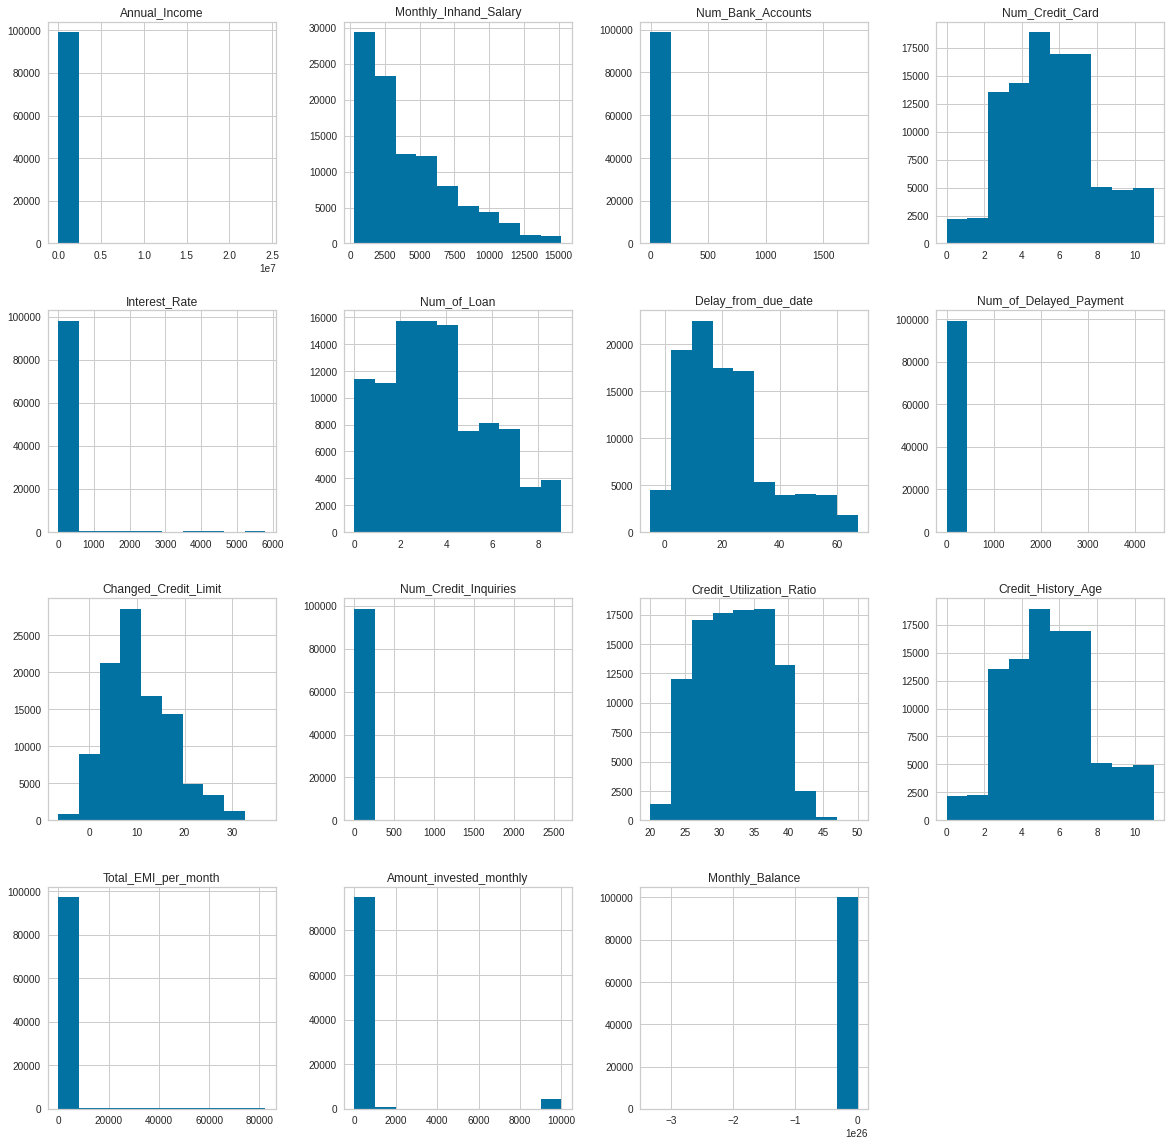

In [127]:
%matplotlib inline
train_processed.hist(figsize = (20,20))
plt.show()

## Visualize Target

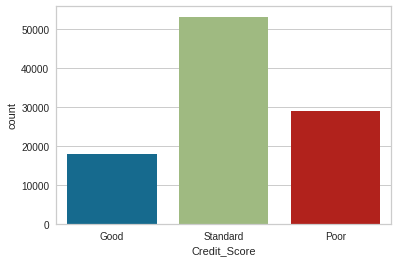

In [129]:
sns.countplot(x='Credit_Score',data=train_processed)
plt.show()

* The data seems imbalanced

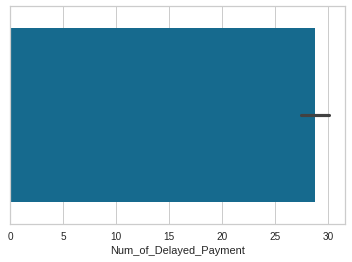

In [131]:
sns.barplot(x='Num_of_Delayed_Payment',data=train_processed)
plt.show()

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(train_processed.corr(),annot=True,fmt=".2f")
plt.show()

In [47]:
train_processed.to_csv("/content/drive/MyDrive/HackerEarth/TransUnion/train_processed.csv",index=False)
test_processed.to_csv("/content/drive/MyDrive/HackerEarth/TransUnion/test_processed.csv",index=False)

In [26]:
train_processed = pd.read_csv("/content/drive/MyDrive/HackerEarth/TransUnion/train_processed.csv")
test_processed = pd.read_csv("/content/drive/MyDrive/HackerEarth/TransUnion/test_processed.csv")

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
cat_cols = [col for col in train_processed.columns if train_processed[col].dtypes == 'object']
cat_cols

['Customer_ID',
 'Month',
 'Occupation',
 'Credit_Mix',
 'Outstanding_Debt',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

In [28]:
train_processed['Outstanding_Debt'].dtypes

dtype('O')

In [29]:
train_processed['Outstanding_Debt'] = train_processed['Outstanding_Debt'].astype('str').map(repl_)

In [30]:
train_processed['Outstanding_Debt'] = train_processed['Outstanding_Debt'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [31]:
test_processed['Outstanding_Debt'] = test_processed['Outstanding_Debt'].astype('str').map(repl_)

In [32]:
test_processed['Outstanding_Debt'] = test_processed['Outstanding_Debt'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [33]:
cate_cols  = ['Customer_ID',
 'Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']

In [34]:
lb = LabelEncoder()
for col in cate_cols :
  train_processed[col] = lb.fit_transform(train_processed[col])
  test_processed[col] = lb.transform(test_processed[col])

In [36]:
train_processed['Outstanding_Debt'] = train_processed['Outstanding_Debt'].astype('float64')

In [37]:
test_processed['Outstanding_Debt'] = test_processed['Outstanding_Debt'].astype('float64')

In [38]:
train_processed.drop('Month',axis=1,inplace=True)

In [39]:
test_processed.drop('Month',axis=1,inplace=True)

In [40]:
train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  int64  
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  int64  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int64  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  int64  
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  in

## Setting up data for pycaret

In [41]:
clf = setup(train_processed, target='Credit_Score', fix_imbalance=True,normalize = True,session_id=42)

,Description,Value
0,session_id,42
1,Target,Credit_Score
2,Target Type,Multiclass
3,Label Encoded,"Good: 0, Poor: 1, Standard: 2"
4,Original Data,"(100000, 23)"
5,Missing Values,False
6,Numeric Features,15
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


## Comapre Models

In [42]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7790,0.8866,0.7811,0.7835,0.7799,0.6396,0.6410,66.143
et,Extra Trees Classifier,0.7611,0.8704,0.7517,0.7623,0.7615,0.6049,0.6051,60.422
catboost,CatBoost Classifier,0.7555,0.8692,0.7506,0.7586,0.7564,0.5984,0.5989,159.525
xgboost,Extreme Gradient Boosting,0.7461,0.8653,0.7389,0.7491,0.7471,0.5820,0.5824,145.034
lightgbm,Light Gradient Boosting Machine,0.7262,0.8541,0.7270,0.7342,0.7282,0.5544,0.5560,44.264
gbc,Gradient Boosting Classifier,0.6922,0.8295,0.7092,0.7142,0.6962,0.5123,0.5184,163.251
dt,Decision Tree Classifier,0.6887,0.7376,0.6742,0.6904,0.6893,0.4861,0.4863,41.111
knn,K Neighbors Classifier,0.6663,0.8220,0.7190,0.7168,0.6673,0.4926,0.5127,204.030
ada,Ada Boost Classifier,0.6536,0.7496,0.6718,0.6786,0.6579,0.4544,0.4612,48.510
lda,Linear Discriminant Analysis,0.6421,0.7713,0.6714,0.6728,0.6461,0.4413,0.4504,40.098


In [43]:
print(best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


## Evaluate the Best Model

In [44]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Make Predictions on the Validation data

In [45]:
predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7829,0.889,0.7845,0.7868,0.7838,0.6461,0.6472


,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Payment_Behaviour_0,Payment_Behaviour_1,Payment_Behaviour_2,Payment_Behaviour_3,Payment_Behaviour_4,Payment_Behaviour_5,Payment_Behaviour_6,Credit_Score,Label,Score
0,-1.080215,-0.322772,-0.093106,-0.159653,-0.138190,-0.134615,-0.810345,-0.104383,0.049894,-0.142793,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Good,Good,0.55
1,0.466544,-1.345019,-0.113193,-0.920420,-0.079278,-0.117635,-0.203742,-0.054429,1.701548,-0.095739,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Poor,Poor,0.87
2,-1.435241,0.699475,-0.033115,2.103918,-0.104526,-0.132492,-1.214746,-0.131631,-0.968552,3.229431,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Good,Standard,0.55
3,-1.121233,0.141886,-0.109212,-0.808020,-0.096110,-0.087919,-0.405943,-0.072594,0.002661,-0.085282,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Poor,Poor,0.93
4,1.189898,-0.601566,-0.059357,1.037306,-0.138190,-0.130370,-1.349547,-0.131631,-0.094755,-0.121880,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Good,Good,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,-0.620428,1.071202,-0.104242,-0.611759,-0.104526,-0.138860,0.470260,-0.063511,1.207085,-0.121880,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Standard,Standard,0.93
29997,-1.675804,-0.229840,-0.116053,-1.108108,-0.062446,-0.109144,-0.001542,-0.027180,1.353210,-0.111424,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Poor,Poor,0.82
29998,1.259462,-0.043977,-0.113012,-0.901552,-0.079278,-0.109144,-0.068942,-0.058970,-0.848996,-0.095739,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Poor,Poor,0.53
29999,-1.012868,-1.345019,-0.096387,-0.249858,-0.096110,-0.107022,2.761869,-0.049887,1.344354,-0.085282,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Poor,Poor,0.63


## Visualize the inference made by the best fit model

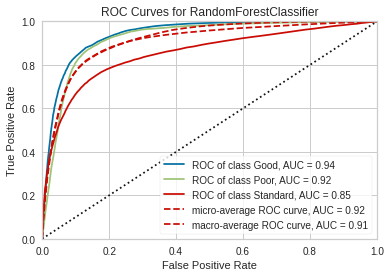

In [46]:
plot_model(best_model, plot = 'auc')

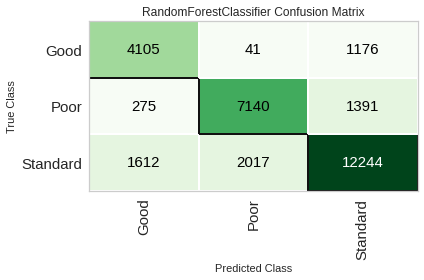

In [47]:
plot_model(best_model, plot = 'confusion_matrix')

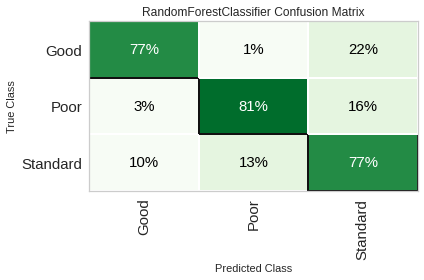

In [55]:
plot_model(best_model , plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

## Tune best Model

In [50]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6710,0.8282,0.7224,0.7295,0.6742,0.5010,0.5225
1,0.6743,0.8322,0.7220,0.7267,0.6777,0.5033,0.5223
2,0.6786,0.8310,0.7245,0.7291,0.6820,0.5090,0.5274
3,0.6660,0.8216,0.7132,0.7223,0.6703,0.4920,0.5116
4,0.6744,0.8292,0.7231,0.7301,0.6781,0.5049,0.5252
5,0.6686,0.8254,0.7137,0.7247,0.6736,0.4953,0.5145
6,0.6713,0.8286,0.7208,0.7276,0.6745,0.5007,0.5213
7,0.6700,0.8261,0.7116,0.7217,0.6749,0.4956,0.5132
8,0.6769,0.8294,0.7215,0.7270,0.6804,0.5059,0.5240


## Evaluate the tuned model

In [51]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Visualize the inference made by the best fit model

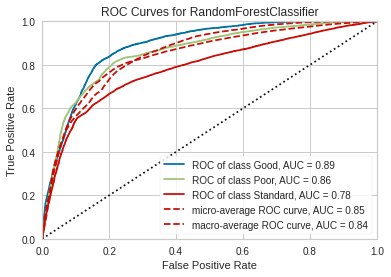

In [52]:
plot_model(tuned_model, plot = 'auc')

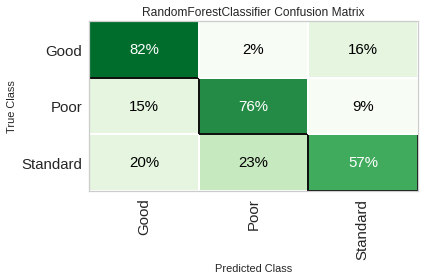

In [53]:
plot_model(tuned_model , plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

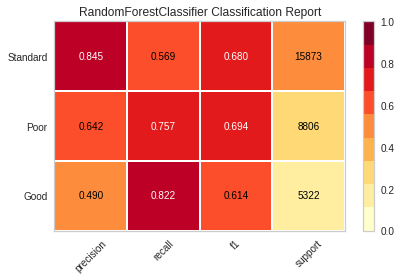

In [54]:
plot_model(tuned_model , plot = 'class_report')

## Feature Importance

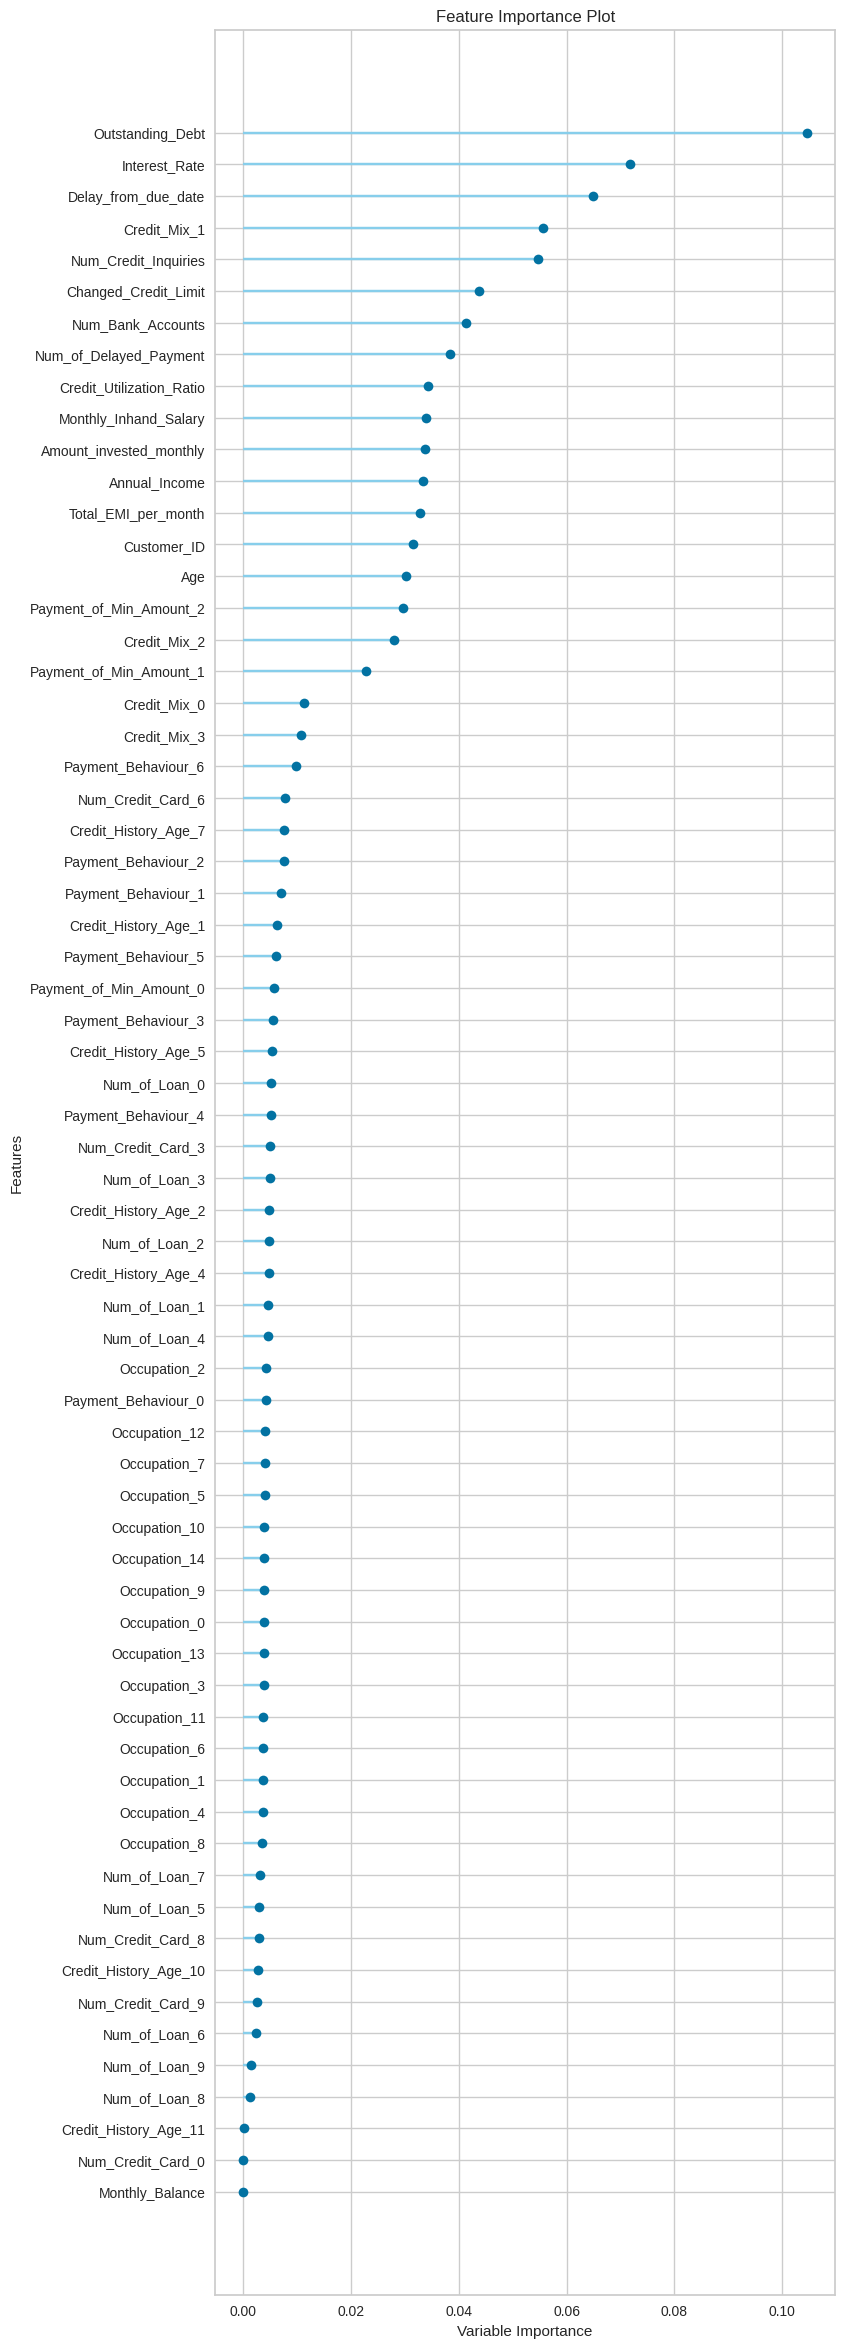

In [49]:
plot_model(best_model, plot = 'feature_all', use_train_data = True)

## To generate labels on the unseen (new) dataset, simply pass the test dataset in the predict_model function

In [56]:
predictions = predict_model(best_model, data=test_processed)
predictions.head()

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Label,Score
0,12320,23,12,19114.12,1824.843333,3,4,3,4,3,...,809.979980,35.030402,4,1,49.574949,236.642682,6,186.266702,Good,0.79
1,12320,23,12,19114.12,1824.843333,3,4,3,4,3,...,809.979980,33.053114,4,1,49.574949,21.465380,2,361.444004,Good,0.56
2,12320,23,12,19114.12,1824.843333,3,4,3,4,-1,...,809.979980,33.811894,4,1,49.574949,148.233938,5,264.675446,Good,0.77
3,12320,23,12,19114.12,1824.843333,3,4,3,4,4,...,809.979980,32.430559,4,1,49.574949,39.082511,2,343.826873,Good,0.75
4,1066,28,13,34847.84,3037.986667,2,4,6,1,3,...,605.030029,25.926822,4,1,18.816215,39.684018,1,485.298434,Good,0.82


<AxesSubplot:xlabel='Label', ylabel='count'>

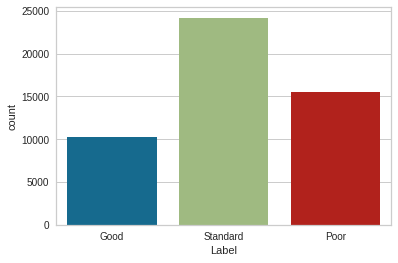

In [57]:
sns.countplot(x='Label',data=predictions)

In [60]:
test[['ID']].head()

,ID
0,0x160a
1,0x160b
2,0x160c
3,0x160d
4,0x1616


In [64]:
test.shape

(50000, 27)

In [61]:
pycaret = test[['ID']].copy()
pycaret['Credit_Score'] = predictions['Label']

In [65]:
pycaret.shape

(50000, 2)

In [66]:
pycaret.to_csv("Transunion_Hackerearth.csv",index=False)

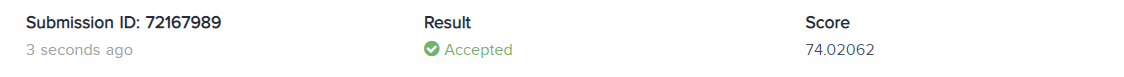

## Analyze Models with Plots

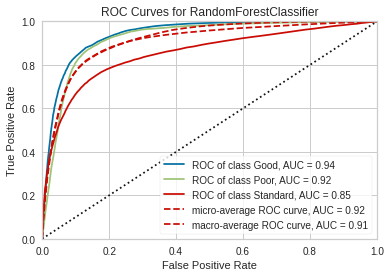

In [67]:
plot_model(best_model)

## Model Explainability : Interpret Models with SHAP ( For compatible model types )

In [ ]:
interpret_model(best_model)

In [ ]:
interpret_model(best_model, plot = 'correlation')